In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load metadata file into a Dask DataFrame
metadata_path = '/Users/tanmaysagarhuria/Downloads/metadata (1).csv'
metadata = pd.read_csv(metadata_path)

# Load matrix file into a Dask DataFrame
matrix_path = '/Users/tanmaysagarhuria/Downloads/matrix (2).csv'
dask_df = dd.read_csv(matrix_path, sample=4000000)  # Adjust the sample size if needed

In [3]:
import dask.dataframe as dd
import pandas as pd
import dask.array as da
import numpy as np
import dask_ml
from dask_ml.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from dask_ml.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import dask_ml.metrics as dmetrics

# Step 1: Inspect the data to understand its structure
print(metadata.head())
print(dask_df.head())

           sample_name   exp_component_name specimen_type cluster_color  \
0  F2S4_160113_027_A01  LS-15005h_S01_E1-50       nucleus           NaN   
1  F2S4_160113_027_B01  LS-15005h_S02_E1-50       nucleus       #E170FE   
2  F2S4_160113_027_C01  LS-15005h_S03_E1-50       nucleus       #8E5864   
3  F2S4_160113_027_D01  LS-15005h_S04_E1-50       nucleus       #8B5862   
4  F2S4_160113_027_E01  LS-15005h_S05_E1-50       nucleus       #CF6EC9   

   cluster_order          cluster_label class_color  class_order class_label  \
0            NaN                    NaN         NaN          NaN         NaN   
1           32.0      Inh L2-5 VIP TOX2     #0066FF          4.0   GABAergic   
2            2.0     Inh L1 LAMP5 GGT8P     #0066FF          4.0   GABAergic   
3            1.0      Inh L1 LAMP5 NDNF     #0066FF          4.0   GABAergic   
4           34.0  Inh L1-3 VIP ZNF322P1     #0066FF          4.0   GABAergic   

  subclass_color  ...  cell_type_alt_alias_order cell_type_alt_alias

In [4]:
# Remove any rows with missing values in key columns (e.g., 'sample_name')
metadata_cleaned = metadata.dropna(subset=['sample_name', 'cell_type_designation_label'])

# Optionally, drop columns that may not be needed for this analysis
metadata_cleaned = metadata_cleaned.drop(columns=['cluster_color', 'subclass_color', 'external_donor_name_color', 'outlier_type'])

# Reset index for the cleaned metadata
metadata_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned metadata
print(metadata_cleaned.head())

           sample_name   exp_component_name specimen_type  cluster_order  \
0  F2S4_160113_027_B01  LS-15005h_S02_E1-50       nucleus           32.0   
1  F2S4_160113_027_C01  LS-15005h_S03_E1-50       nucleus            2.0   
2  F2S4_160113_027_D01  LS-15005h_S04_E1-50       nucleus            1.0   
3  F2S4_160113_027_E01  LS-15005h_S05_E1-50       nucleus           34.0   
4  F2S4_160113_027_F01  LS-15005h_S06_E1-50       nucleus           35.0   

           cluster_label class_color  class_order class_label  subclass_order  \
0      Inh L2-5 VIP TOX2     #0066FF          4.0   GABAergic             3.0   
1     Inh L1 LAMP5 GGT8P     #0066FF          4.0   GABAergic             1.0   
2      Inh L1 LAMP5 NDNF     #0066FF          4.0   GABAergic             1.0   
3  Inh L1-3 VIP ZNF322P1     #0066FF          4.0   GABAergic             3.0   
4       Inh L3 VIP CBLN1     #0066FF          4.0   GABAergic             3.0   

  subclass_label  ...  cell_type_alias_label  cell_type_

In [7]:
import pandas as pd

# Load the HSV-normalized matrix
hsv_normalized_path = '/Users/tanmaysagarhuria/hvg_normalized_output.csv'
hsv_normalized_df = pd.read_csv(hsv_normalized_path)

# Display the first few rows of the HSV-normalized matrix to analyze its structure
print(hsv_normalized_df.head())
print(hsv_normalized_df.columns)

        A2M      AAAS      AACS  AADAT     AAGAB      AARS     AASDH  \
0  3.737670  0.000000  3.610918    0.0  0.000000  0.693147  1.791759   
1  0.000000  0.693147  5.446737    0.0  6.539586  6.025866  0.000000   
2  0.000000  0.000000  0.000000    0.0  0.000000  1.609438  0.693147   
3  0.000000  0.000000  0.000000    0.0  0.000000  4.143135  5.247024   
4  0.693147  0.000000  3.091042    0.0  0.693147  4.304065  5.411646   

   AASDHPPT      ABAT    ABCA10  ...   ZSCAN18   ZSCAN26   ZSCAN30   ZSCAN31  \
0  0.000000  5.010635  2.890372  ...  2.397895  0.000000  0.693147  0.693147   
1  3.610918  6.577861  0.000000  ...  2.302585  0.000000  0.000000  0.000000   
2  0.000000  4.919981  6.244167  ...  0.000000  0.000000  0.000000  0.693147   
3  4.941642  4.948760  2.079442  ...  5.099866  6.200509  4.234107  0.000000   
4  0.000000  5.991465  5.707110  ...  3.091042  0.000000  6.340359  2.397895   

     ZSWIM5    ZSWIM6      ZXDC    ZYG11B     ZZEF1      ZZZ3  
0  5.866468  0.693147 

In [8]:
dask_df = dask_df.fillna(0)  # Filling missing values with 0

In [10]:
import dask.dataframe as dd

# Specify the path to the CSV file
normalized_data_path = '/Users/tanmaysagarhuria/Downloads/dask_df_normalized_output.csv'

# Increase the sample size to 1 GB and load the CSV file into a Dask DataFrame
normalized_ddf = dd.read_csv(normalized_data_path, sample=1000000000)  # sample size set to 1GB

# Display the first few rows to confirm it loaded correctly
print(normalized_ddf.head())

   Unnamed: 0          sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  \
0           0  F2S4_160113_027_A01      0.0      0.0      0.0      0.0   
1           1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0   
2           2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0   
3           3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0   
4           4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0   

   5-HT3C2      A1BG  A1BG-AS1  A1CF  ...  ZXDB      ZXDC    ZYG11A  ZYG11AP1  \
0      0.0  0.000000       0.0   0.0  ...   0.0  5.645447  0.000000       0.0   
1      0.0  4.779123       0.0   0.0  ...   0.0  6.794587  0.000000       0.0   
2      0.0  0.000000       0.0   0.0  ...   0.0  0.000000  0.693147       0.0   
3      0.0  5.075174       0.0   0.0  ...   0.0  5.049856  0.693147       0.0   
4      0.0  0.693147       0.0   0.0  ...   0.0  2.708050  0.693147       0.0   

     ZYG11B      ZYX     ZZEF1      ZZZ3  bA255A11.4  bA395L14.12  


In [11]:
import dask.dataframe as dd

# Assuming you have both normalized_ddf and metadata_cleaned loaded as Dask DataFrames

# Merge the normalized data with the cleaned metadata on 'sample_name'
merged_ddf = dd.merge(normalized_ddf, metadata_cleaned, on='sample_name', how='inner')

# Display the first few rows of the merged DataFrame to confirm the merge was successful
print(merged_ddf.head())

   Unnamed: 0          sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  \
0           1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0   
1           2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0   
2           3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0   
3           4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0   
4           5  F2S4_160113_027_F01      0.0      0.0      0.0      0.0   

   5-HT3C2      A1BG  A1BG-AS1  A1CF  ...  cell_type_alias_label  \
0      0.0  4.779123       0.0   0.0  ...      Inh L2-5 VIP TOX2   
1      0.0  0.000000       0.0   0.0  ...     Inh L1 LAMP5 GGT8P   
2      0.0  5.075174       0.0   0.0  ...      Inh L1 LAMP5 NDNF   
3      0.0  0.693147       0.0   0.0  ...  Inh L1-3 VIP ZNF322P1   
4      0.0  2.397895       0.0   0.0  ...       Inh L3 VIP CBLN1   

   cell_type_alt_alias_color  cell_type_alt_alias_order  \
0                    #E170FE                       32.0   
1                    #8E5864

In [13]:
# List of genes related to serotonin, dopamine, and acetylcholine receptors
receptor_genes = ['HTR1A', 'HTR1B', 'HTR2A', 'HTR2B', 'HTR2C', 'HTR3A', 'HTR4', 'HTR5A', 
                  'HTR6', 'HTR7', 'DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5',
                  'CHRNA1', 'CHRNA2', 'CHRNA3', 'CHRNA4', 'CHRNA5', 'CHRNA6', 
                  'CHRNA7', 'CHRNA9', 'CHRNA10', 'CHRNB1', 'CHRNB2', 'CHRNB3', 
                  'CHRNB4', 'CHRND', 'CHRNE', 'CHRNG', 'CHRM1', 'CHRM2', 'CHRM3', 
                  'CHRM4', 'CHRM5']

In [14]:
# Filter the normalized data to include only these genes
filtered_ddf = normalized_ddf[[col for col in normalized_ddf.columns if col in receptor_genes or col == 'sample_name']]

In [15]:
# Display the filtered DataFrame
print(filtered_ddf.head())

           sample_name  CHRM1     CHRM2     CHRM3  CHRM4  CHRM5  CHRNA1  \
0  F2S4_160113_027_A01    0.0  0.000000  7.477604    0.0    0.0     0.0   
1  F2S4_160113_027_B01    0.0  2.484907  7.235619    0.0    0.0     0.0   
2  F2S4_160113_027_C01    0.0  0.000000  7.050123    0.0    0.0     0.0   
3  F2S4_160113_027_D01    0.0  0.000000  6.748760    0.0    0.0     0.0   
4  F2S4_160113_027_E01    0.0  6.689599  6.612041    0.0    0.0     0.0   

    CHRNA10  CHRNA2    CHRNA3  ...  HTR1A  HTR1B     HTR2A  HTR2B     HTR2C  \
0  0.693147     0.0  0.000000  ...    0.0    0.0  0.000000    0.0  3.583519   
1  0.000000     0.0  0.000000  ...    0.0    0.0  0.000000    0.0  0.000000   
2  1.098612     0.0  0.693147  ...    0.0    0.0  0.000000    0.0  1.386294   
3  0.000000     0.0  0.693147  ...    0.0    0.0  5.572154    0.0  0.000000   
4  0.000000     0.0  0.000000  ...    0.0    0.0  0.000000    0.0  7.486613   

   HTR3A      HTR4     HTR5A  HTR6      HTR7  
0    0.0  0.693147  0.00000

In [16]:
import scanpy as sc

In [17]:
filtered_df = filtered_ddf.compute()

In [18]:
adata = sc.AnnData(filtered_df.set_index('sample_name'))

In [19]:
sc.tl.pca(adata, svd_solver='arpack')

In [20]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [21]:
# Perform Louvain clustering
sc.tl.louvain(adata, resolution=0.5)

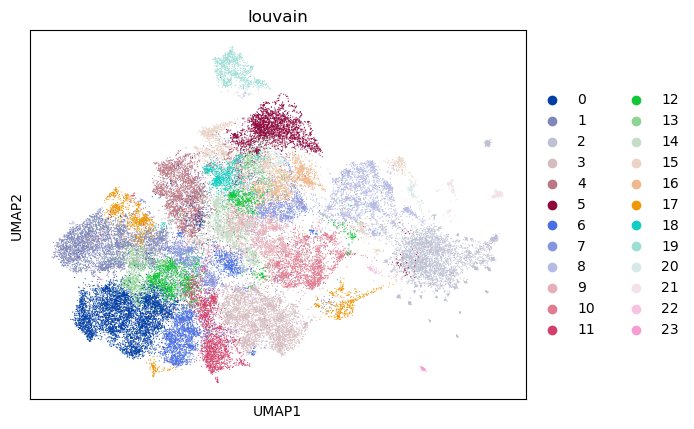

In [22]:
# Plot the UMAP with the clusters
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain'])

In [23]:
# You can also save the clustering results
adata.obs['louvain'].to_csv('/Users/tanmaysagarhuria/Downloads/louvain_clusters.csv')

In [25]:
adata.obs = adata.obs.merge(metadata[['sample_name', 'subclass_label']], on='sample_name', how='left')

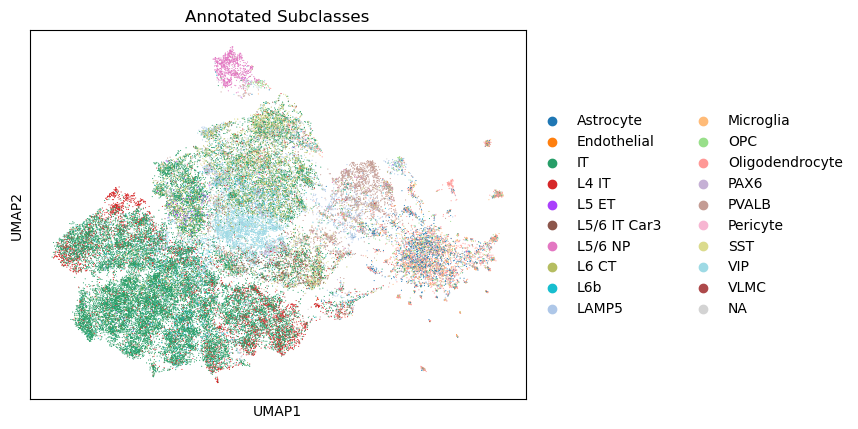

In [26]:
sc.pl.umap(adata, color=['subclass_label'], title='Annotated Subclasses')

In [30]:
adata.obs = adata.obs.merge(metadata[['sample_name', 'class_label']], on='sample_name', how='left')

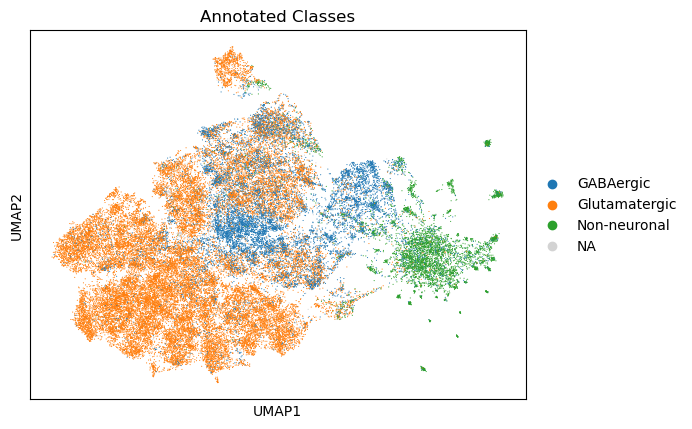

In [32]:
sc.pl.umap(adata, color=['class_label'], title='Annotated Classes')

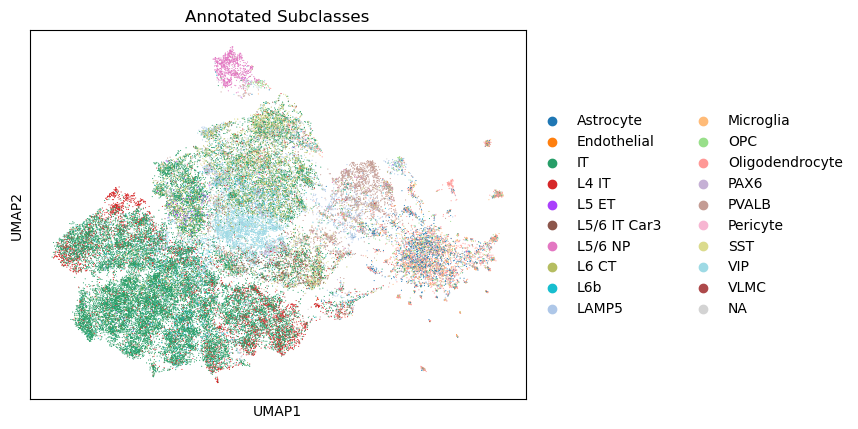

In [33]:
sc.pl.umap(adata, color=['subclass_label'], title='Annotated Subclasses')

In [34]:
print(adata.obs.columns)

Index(['sample_name', 'louvain', 'subclass_label', 'class_label'], dtype='object')


In [35]:
print(metadata.head())

           sample_name   exp_component_name specimen_type cluster_color  \
0  F2S4_160113_027_A01  LS-15005h_S01_E1-50       nucleus           NaN   
1  F2S4_160113_027_B01  LS-15005h_S02_E1-50       nucleus       #E170FE   
2  F2S4_160113_027_C01  LS-15005h_S03_E1-50       nucleus       #8E5864   
3  F2S4_160113_027_D01  LS-15005h_S04_E1-50       nucleus       #8B5862   
4  F2S4_160113_027_E01  LS-15005h_S05_E1-50       nucleus       #CF6EC9   

   cluster_order          cluster_label class_color  class_order class_label  \
0            NaN                    NaN         NaN          NaN         NaN   
1           32.0      Inh L2-5 VIP TOX2     #0066FF          4.0   GABAergic   
2            2.0     Inh L1 LAMP5 GGT8P     #0066FF          4.0   GABAergic   
3            1.0      Inh L1 LAMP5 NDNF     #0066FF          4.0   GABAergic   
4           34.0  Inh L1-3 VIP ZNF322P1     #0066FF          4.0   GABAergic   

  subclass_color  ...  cell_type_alt_alias_order cell_type_alt_alias

In [36]:
print(adata.obs.columns)

Index(['sample_name', 'louvain', 'subclass_label', 'class_label'], dtype='object')


In [37]:
print(metadata.columns)

Index(['sample_name', 'exp_component_name', 'specimen_type', 'cluster_color',
       'cluster_order', 'cluster_label', 'class_color', 'class_order',
       'class_label', 'subclass_color', 'subclass_order', 'subclass_label',
       'full_genotype_color', 'full_genotype_order', 'full_genotype_label',
       'donor_sex_color', 'donor_sex_order', 'donor_sex_label', 'region_color',
       'region_order', 'region_label', 'cortical_layer_color',
       'cortical_layer_order', 'cortical_layer_label',
       'cell_type_accession_color', 'cell_type_accession_order',
       'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_order',
       'cell_type_alias_label', 'cell_type_alt_alias_color',
       'cell_type_alt_alias_order', 'cell_type_alt_alias_label',
       'cell_type_designation_color', 'cell_type_designation_order',
       'cell_type_designation_label', 'external_donor_name_color',
       'external_donor_name_order', 'external_donor_name_label',
       'outlier_call', 'outli

In [38]:
adata.obs = adata.obs.merge(metadata[['sample_name', 'region_label']], on='sample_name', how='left')

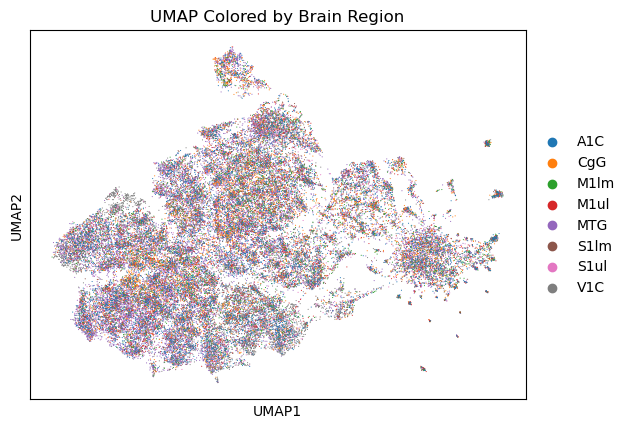

In [39]:
sc.pl.umap(adata, color=['region_label'], title='UMAP Colored by Brain Region')

In [40]:
print(normalized_ddf.head())

   Unnamed: 0          sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  \
0           0  F2S4_160113_027_A01      0.0      0.0      0.0      0.0   
1           1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0   
2           2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0   
3           3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0   
4           4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0   

   5-HT3C2      A1BG  A1BG-AS1  A1CF  ...  ZXDB      ZXDC    ZYG11A  ZYG11AP1  \
0      0.0  0.000000       0.0   0.0  ...   0.0  5.645447  0.000000       0.0   
1      0.0  4.779123       0.0   0.0  ...   0.0  6.794587  0.000000       0.0   
2      0.0  0.000000       0.0   0.0  ...   0.0  0.000000  0.693147       0.0   
3      0.0  5.075174       0.0   0.0  ...   0.0  5.049856  0.693147       0.0   
4      0.0  0.693147       0.0   0.0  ...   0.0  2.708050  0.693147       0.0   

     ZYG11B      ZYX     ZZEF1      ZZZ3  bA255A11.4  bA395L14.12  


In [41]:
print(merged_ddf.head())

   Unnamed: 0          sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  \
0           1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0   
1           2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0   
2           3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0   
3           4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0   
4           5  F2S4_160113_027_F01      0.0      0.0      0.0      0.0   

   5-HT3C2      A1BG  A1BG-AS1  A1CF  ...  cell_type_alias_label  \
0      0.0  4.779123       0.0   0.0  ...      Inh L2-5 VIP TOX2   
1      0.0  0.000000       0.0   0.0  ...     Inh L1 LAMP5 GGT8P   
2      0.0  5.075174       0.0   0.0  ...      Inh L1 LAMP5 NDNF   
3      0.0  0.693147       0.0   0.0  ...  Inh L1-3 VIP ZNF322P1   
4      0.0  2.397895       0.0   0.0  ...       Inh L3 VIP CBLN1   

   cell_type_alt_alias_color  cell_type_alt_alias_order  \
0                    #E170FE                       32.0   
1                    #8E5864

In [42]:
import pandas as pd
import numpy as np

In [43]:
def calculate_cpm(df):
    counts_sum = df.sum(axis=0)
    return (df / counts_sum) * 1e6

In [45]:
numeric_cols = merged_ddf.select_dtypes(include=[np.number]).columns
numeric_df = merged_ddf[numeric_cols]

In [46]:
cpm_df = calculate_cpm(numeric_df)

In [47]:
min_cpm = 1
min_samples = numeric_df.shape[1] // 2
cpm_filtered_df = numeric_df[(cpm_df >= min_cpm).sum(axis=1) >= min_samples]

In [48]:
# Step 2: Low Count Filtering
min_count = 10
min_sample_count = 3
low_count_filtered_df = cpm_filtered_df[(cpm_filtered_df >= min_count).sum(axis=1) >= min_sample_count]


In [53]:
# Check the type of the object
print(type(low_count_filtered_df))

<class 'dask_expr._collection.DataFrame'>


In [ ]:
# Check which genes are in your list
subset_indices = pandas_index.isin(serotonin_genes)

In [ ]:
serotonin_subset_df = low_count_filtered_df.loc[subset_indices]